# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [ikhsanuddin Rezki]
- **Email:** [ikhsanloris@gmail.com]
- **ID Dicoding:** [iksanuddin]

## Menentukan Pertanyaan Bisnis



1.   Produk apa yang memiliki jumlah pembelian tertinggi dan Terendah?

2.    Bagaimana tingkat kepuasan pembeli terhadap produk berdasarkan rating ulasan?

3.    Bagaimana volume total pesanan per bulan?




## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_df = pd.read_csv('orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_df = pd.read_csv('product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sallers_df = pd.read_csv('sellers_dataset.csv')
sallers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [ ]:
customers_df.info()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Jumlah duplikasi:  261831

In [ ]:
geolocation_df.info()
geolocation_df.isna().sum()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


price = 6735 ? Telalu Tinggi

untuk kolom price rata-rata harga adalah 120.65 tetapi ada nilai ekstrem yang jauh lebih tinggi dari rata-rata

In [ ]:
order_items_df.info()
order_items_df.isna().sum()
print("Jumlah Duplikasi :" , order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah Duplikasi : 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_payments_df.info()
order_payments_df.isna().sum()
print("Jumlah Duplikasi : " , order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah Duplikasi :  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Misiing Value**

review_comment_title    =  11568

review_comment_message  =  40977

In [ ]:
order_reviews_df.info()
order_reviews_df.isna().sum()
print("Jumlah Duplikasi : " , order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah Duplikasi :  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Data serupa tetapi memiliki perbedaan penulisan



*   Recomendo	423

*   Recomendo	345  



In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


Data serupa tetapi memiliki perbedaan penulisan

Muito bom	230

muito bom 122

Bom 189

Bom 107





In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


Missing Value pada Order_df colom :

  order_approved_at              99281 non-null  object

  order_delivered_carrier_date   97658 non-null  object

  order_delivered_customer_date  96476 non-null  object

In [ ]:
order_df.info()
order_df.isna().sum()
print("Jumlah Duplikasi : " , order_df.duplicated().sum())
order_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah Duplikasi :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
product_category_df.info()
product_category_df.isna().sum()
print("Jumlah Duplikasi : " , product_category_df.duplicated().sum())
product_category_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah Duplikasi :  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


** Missing Value**

 1   product_category_name - 6.610 missing values

 2   product_name_lenght - 6.610 missing values

 3   product_description_lenght - 6.610 missing values

 4   product_photos_qty - 6.610 missing values

 5   product_weight_g - 2 missing values

 6   product_length_cm - 2 missing values

 7   product_height_cm - 2 missing values

 8   product_width_cm - 2 missing values

In [ ]:
products_df.info()
products_df.isna().sum()
print("Jumlah Duplikasi : " , products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah Duplikasi :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
sallers_df.info()
sallers_df.isna().sum()
print("Jumlah Duplikasi : " , sallers_df.duplicated().sum())
sallers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah Duplikasi :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Menghilangkan duplicate data pada geolocation_dataset

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Menghilangkan Outlier pada kolom price pada order_items_dataset

In [ ]:
order_items_df[order_items_df.price == order_items_df.price.max()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [ ]:
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1  # Menghitung Interquartile Range (IQR)

# Menyaring data dengan menghapus outliers
order_items_df = order_items_df[~((order_items_df['price'] < (Q1 - 1.5 * IQR)) | (order_items_df['price'] > (Q3 + 1.5 * IQR)))]

order_items_df[order_items_df.price == order_items_df.price.max()]
order_items_df.describe()

,order_item_id,price,freight_value
count,104223.000000,104223.000000,104223.000000
mean,1.207526,83.974668,18.558853
std,0.722539,58.580002,12.049322
min,1.000000,0.850000,0.000000
25%,1.000000,38.500000,12.790000
50%,1.000000,69.000000,16.010000
75%,1.000000,118.990000,19.840000
max,21.000000,277.300000,299.160000


Menghilangkan Missing Value pada order_reviews kolom

1.   Review_comment_title
2.   Review_comment_message



In [ ]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
order_reviews_df.review_comment_title.isna()

,review_comment_title
0,True
1,True
2,True
3,True
4,True
...,...
99219,True
99220,True
99221,True
99222,True


In [ ]:
order_reviews_df.review_comment_message.isna()

,review_comment_message
0,True
1,True
2,True
3,False
4,False
...,...
99219,True
99220,True
99221,False
99222,True


In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [ ]:
# Ubah semua judul ulasan menjadi huruf kecil untuk menggabungkan nilai serupa
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.upper()

# Hitung ulang frekuensi setelah normalisasi
frekuensi_judul = order_reviews_df['review_comment_title'].value_counts()

# Dapatkan nilai yang paling sering muncul
judul_tersering = frekuensi_judul.index[0]

# Isi nilai yang hilang dengan judul yang paling sering muncul
order_reviews_df['review_comment_title'].fillna(judul_tersering, inplace=True)

In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
RECOMENDO,88481
SUPER RECOMENDO,578
BOM,406
MUITO BOM,333
EXCELENTE,304
...,...
COMPRARIA NOVAMENTE,1
IRRITANTE,1
GEROU DUVIDA,1


In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [ ]:
# Ubah semua nilai di kolom 'review_comment_message' menjadi huruf besar
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.upper()

# Hitung frekuensi kemunculan setiap nilai di kolom 'review_comment_message'
frekuensi_message = order_reviews_df['review_comment_message'].value_counts()

# Ambil nilai yang paling sering muncul
message_tersering = frekuensi_message.index[0]

# Isi nilai yang hilang di kolom 'review_comment_message' dengan nilai yang paling sering muncul
order_reviews_df['review_comment_message'].fillna(message_tersering, inplace=True)

In [ ]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
MUITO BOM,58616
BOM,309
OTIMO,207
RECOMENDO,175
OK,139
...,...
ÓTIMA LOJA ENTREGA ANTES DO PRAZO,1
RECEBI NO TEMPO CERTO.OBRIGADO.,1
"PRODUTO UM POUÇO MAIOR DO QUE NA IMAGEM, MAS FICOU LEGAL.",1


In [ ]:
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Mengatasi Missing Value pada Order_df colom :

    order_approved_at              99281 non-null  object

    order_delivered_carrier_date   97658 non-null  object

    order_delivered_customer_date  96476 non-null  object

In [ ]:
order_df.info()
order_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Mengatasi Missing Values Berdasarkan Frekuensi (Modus):

In [ ]:
order_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [ ]:
most_common_time = order_df['order_approved_at'].mode()[0]
order_df['order_approved_at'].fillna(most_common_time, inplace=True)

In [ ]:
order_df.info()
order_df.order_approved_at.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,count
order_approved_at,
2018-02-27 04:31:10,169
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [ ]:
order_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [ ]:
most_common_carrier_date = order_df['order_delivered_carrier_date'].mode()[0]
order_df['order_delivered_carrier_date'].fillna(most_common_carrier_date, inplace=True)

In [ ]:
order_df.info()
order_df.order_approved_at.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,count
order_approved_at,
2018-02-27 04:31:10,169
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


Menggunakan order_estimated_delivery_date sebagai Acuan:

In [ ]:
# Menghitung delta waktu rata-rata (dalam hari)
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])

avg_carrier_delta = (order_df['order_delivered_carrier_date'] - order_df['order_approved_at']).mean()
avg_customer_delta = (order_df['order_delivered_customer_date'] - order_df['order_delivered_carrier_date']).mean()

# Mengisi missing values pada 'order_delivered_carrier_date' dan 'order_delivered_customer_date'
order_df['order_delivered_carrier_date'].fillna(order_df['order_approved_at'] + avg_carrier_delta, inplace=True)
order_df['order_delivered_customer_date'].fillna(order_df['order_delivered_carrier_date'] + avg_customer_delta, inplace=True)

print(order_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

In [ ]:
order_df.info()
order_df.order_approved_at.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


,count
order_approved_at,
2018-02-27 04:31:10,169
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


-Berdasarkan Mean/Median:mengisi missing values untuk kolom   
   numerik seperti product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan mean atau median kolom tersebut.

-Berdasarkan Mode atau Kategori: Untuk kolom kategorikal  
   seperti product_category_name, mengisi missing values dengan mode nilai yang paling sering muncul

In [ ]:
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# Mengisi missing values untuk kolom numerik dengan mean
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

# Mengisi missing values untuk kolom kategorikal dengan mode
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mode()[0], inplace=True)

print(products_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

In [ ]:
products_df.info()
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.166975,2276.472488,30.815078,16.937661,23.196728
std,10.150458,629.208849,1.728063,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Exploratory Data Analysis (EDA)

### Explore Data customers_df

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore Data geolocation_df

In [ ]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [ ]:
# Hitung jumlah pembelian berdasarkan kota
city_purchase_counts = geolocation_df['geolocation_city'].value_counts()

# Hitung jumlah pembelian berdasarkan negara bagian
state_purchase_counts = geolocation_df['geolocation_state'].value_counts()

# Tampilkan kota dan negara bagian dengan jumlah pembelian terbanyak
print("Kota dengan Jumlah Pembelian Terbanyak:")
print(city_purchase_counts.head())

print("\nNegara Bagian dengan Jumlah Pembelian Terbanyak:")
print(state_purchase_counts.head())

Kota dengan Jumlah Pembelian Terbanyak:
geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
Name: count, dtype: int64

Negara Bagian dengan Jumlah Pembelian Terbanyak:
geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
Name: count, dtype: int64


Memperbaiki format nama kota "São Paulo" sehingga konsisten dengan "Sao Paulo,"

In [ ]:
# Ubah format nama kota menjadi konsisten
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].replace('são paulo', 'sao paulo')

# Hitung jumlah pembelian berdasarkan kota setelah perubahan
city_purchase_counts = geolocation_df['geolocation_city'].value_counts()

# Tampilkan hasil
print("Kota dengan Jumlah Pembelian Terbanyak:")
print(city_purchase_counts.head())

print("\nNegara Bagian dengan Jumlah Pembelian Terbanyak:")
print(state_purchase_counts.head())

Kota dengan Jumlah Pembelian Terbanyak:
geolocation_city
sao paulo         99645
rio de janeiro    35177
belo horizonte    19474
curitiba          11263
porto alegre       8702
Name: count, dtype: int64

Negara Bagian dengan Jumlah Pembelian Terbanyak:
geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
Name: count, dtype: int64


In [ ]:
# Tampilkan kota dan negara bagian dengan jumlah pembelian terendah
print("Kota dengan Jumlah Pembelian Terendah:")
print(city_purchase_counts.tail())

print("\nNegara Bagian dengan Jumlah Pembelian Terendah:")
print(state_purchase_counts.tail())

Kota dengan Jumlah Pembelian Terendah:
geolocation_city
são joão do oeste    1
mondaí               1
tunápolis            1
salgadinho           1
casserengue          1
Name: count, dtype: int64

Negara Bagian dengan Jumlah Pembelian Terendah:
geolocation_state
RO    2523
AM    1986
AC    1039
AP     738
RR     568
Name: count, dtype: int64


### Explore Data order_df

In [ ]:
order_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9047,cdbbf42ba3892a989ca5b644ee43db7f,d147a2516941f9b1fa511da01902a86b,delivered,2018-08-03 10:42:40,2018-08-03 11:04:21,2018-08-03 12:57:00,2018-08-13 18:22:21.000000000,2018-08-29
35858,494c2e94dcd29167f5fe359a45aa879d,6dd39ae1549359ab24a5110b54452360,delivered,2017-01-23 11:43:58,2017-01-23 11:55:22,2017-01-25 12:18:26,2017-02-01 13:22:01.000000000,2017-03-06
35847,41cb3bd1d36812fb4ffa52d34ba8eb21,f738a2cf8579894bbbc0c34a835f3fe2,delivered,2018-04-25 09:14:56,2018-04-26 04:10:53,2018-04-27 13:17:00,2018-05-04 15:16:37.000000000,2018-05-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-05-09 15:48:00,2018-05-18 23:41:18.800230109,2018-08-21
89117,d433845d639396a68c33b577f1dc575b,d99e12c88fdf79fc53020181a3ab5dce,delivered,2018-05-10 19:05:45,2018-05-10 19:37:20,2018-05-16 12:26:00,2018-05-17 17:02:00.000000000,2018-05-18
63642,ae1a4a7e9405651217877f3182d83bc0,1c197b9b9b82cb10c2c64adde64df523,delivered,2018-01-17 10:23:32,2018-01-17 10:33:24,2018-01-18 18:51:47,2018-01-22 20:49:36.000000000,2018-02-01
43124,b9dd3c9858c240eba0ec042ec9f47c01,09915c12803ae121d230703fdb376015,delivered,2018-07-24 15:46:12,2018-07-25 02:35:13,2018-07-26 14:26:00,2018-07-31 21:42:59.000000000,2018-08-17
42943,be5d9df3cb44dbb469a80581ede808a2,353aa71e2ad73b4ef96748be41c1b9e0,delivered,2017-09-08 11:27:46,2017-09-12 04:50:36,2017-09-14 20:09:45,2017-09-19 16:20:13.000000000,2017-10-03
94800,197b967f01bda6ab29436b91844e5e90,54c1128e63b28664c615c1b7f33636bc,delivered,2018-03-26 19:55:47,2018-03-27 19:50:21,2018-04-09 23:23:25,2018-04-22 14:58:33.000000000,2018-04-13
66348,4ed8ff23c5c750ac1bd49b98d15f7bb8,990670426160550fd10e610fc2b6f713,delivered,2017-03-13 08:11:00,2017-03-13 08:11:00,2017-03-15 07:51:33,2017-03-28 13:52:40.000000000,2017-04-11


Menghitung waktu pengiriman dari saat paket diterima oleh kurir hingga sampai ke pelanggan

In [ ]:
# Menghitung waktu pengiriman
delivery_time = order_df['order_delivered_customer_date'] - order_df['order_delivered_carrier_date']

# Mengonversi waktu pengiriman ke total detik
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

# Mengonversi detik ke hari dan membulatkan
order_df['delivery_time'] = round(delivery_time / 86400)

order_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
98370,2fa10f3a5be4a615bac800682c485f1b,35dcde0462f357347f74dace04d02400,delivered,2018-05-08 14:55:15,2018-05-08 15:09:55,2018-05-10 19:07:00,2018-05-11 22:54:43,2018-05-21,1.0
38323,94779a352003cbec1931fe5d7b041f7e,8388b9f092f21ae7a771509fade39ba5,delivered,2018-07-21 21:55:29,2018-07-21 22:10:12,2018-07-23 12:48:00,2018-07-26 20:26:46,2018-08-09,3.0
55261,316206d46dccc0cc43780adbcaa5de1e,c64d87fc485143ed638f208e0f0d861d,delivered,2018-03-17 18:59:33,2018-03-17 19:15:37,2018-03-29 19:56:47,2018-04-03 21:54:52,2018-04-17,5.0
96184,53fcc6acefb2363ea775e316c810677b,af3dfc75878f9fd131f5cc38ac036be4,delivered,2017-08-23 09:13:07,2017-08-23 09:25:41,2017-08-23 16:44:10,2017-08-25 15:09:39,2017-09-13,2.0
74832,29420ac99e8348dec23b07c28884e584,6527168356776dd94bcbd72a3fe1e832,delivered,2017-04-26 09:30:33,2017-04-27 13:10:29,2017-05-04 13:08:14,2017-05-08 07:57:48,2017-05-15,4.0
1232,595f598849d89203c28d05d0fbf3f92e,cefab390926b6fc3de3ca94c82ebb1ba,delivered,2017-09-25 16:38:46,2017-09-25 17:10:25,2017-09-27 17:09:40,2017-10-02 20:55:55,2017-10-19,5.0
44939,6f9548bf66cabc7bc85e7b9fbcb9a9c6,2490b51fb3f142dabbee3e059eba36ee,delivered,2018-08-08 10:55:59,2018-08-08 11:10:18,2018-08-09 12:58:00,2018-08-10 17:38:43,2018-08-17,1.0
60640,d9d4a02bb9f1087deec1dae728740cdb,15649dc883a22d86b0e9dd1466d39057,delivered,2017-10-12 15:30:47,2017-10-12 15:49:25,2017-10-21 11:56:44,2017-11-09 20:32:36,2017-11-01,19.0
4769,39db24edc355863bd882c7e44c782993,f79a79ee780df2dff33e4f6f6536223e,delivered,2018-01-13 22:03:06,2018-01-13 22:10:22,2018-01-17 16:14:30,2018-02-06 18:35:56,2018-02-19,20.0
77694,26df1f409adf3bbb2f057e1ebb11b019,d0b19458cf51e7e8db284742e3f1d96d,delivered,2017-07-23 13:38:32,2017-07-23 13:50:18,2017-07-26 21:12:43,2017-07-28 20:17:38,2017-08-15,2.0


Eksplorasi Data orders_df dan customers_df

In [ ]:
customer_id_in_order_df = order_df.customer_id.values
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
95450,5f7fea0fb833f457217acf62b30f1972,7de6923feb35775fbace1cfc5cfd51f7,22795,rio de janeiro,RJ,Active
9587,f73fe7f38373c066da9781eb5edd029b,4e879fd59d57eacbbf05e06cc7e96eba,1329,sao paulo,SP,Active
48698,ba15d2abe9d748ca9cae18cd1cced72c,b69d80e77b9f6172a5fe86c1979dbc6e,95765,bom principio,RS,Active
94116,fa50e1ab4bfb82d7f1fd7f6f78e6c830,c1c6a4e805bf156a629665fac5840280,37950,sao sebastiao do paraiso,MG,Active
35697,545a80baeb1729733560a1214b08a93d,6b0df71fc82498a7a020d68f44bf531f,75907,rio verde,GO,Active
39002,1d4e1d2283ec54d6b61c685d0f983374,4152b90e8c32c2d1333fa086aa34f58c,5727,sao paulo,SP,Active
31037,6a22bc47f4e4d19f68ea3691bc6a49fe,b507103bd81e5d0dc3e6c3d50a732f36,35600,bom despacho,MG,Active
62424,dfb128d07f7da6edf0fbe08f7cc89c4c,0dd0948583d738cc0a0cf8e1d8f44807,4084,sao paulo,SP,Active
41285,b2031e2f6a70e343bbe4cb6a8aed9680,7a34314f2049a03920798f83027f3f71,38510,irai de minas,MG,Active
23313,47c6d324782f84dff90b3e256495c26f,8fd58a65b8f610c63cff6cd8dda739e9,13024,campinas,SP,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


In [ ]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=order_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [ ]:
customers_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [ ]:
customers_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [ ]:
customers_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
...,...
58421,1
58411,1
58398,1


In [ ]:
customers_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


### Explore Data order_payments_df

In [ ]:
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
36982,9ffbf165bfd976933256254ac8d7bb36,1,boleto,1,183.32
884,2bdd95b017c58f97f4e735116e778d28,1,boleto,1,250.04
42237,2894a7132c45ea461bc47c5a3bb1c6e0,1,credit_card,3,159.13
11730,46f09635953d421a1c088a6e28cea5e0,1,credit_card,2,179.35
42139,7c6b6a9c3d77dcb56f9d216b3edbb1a9,1,credit_card,1,7.36
63265,23580e0d424218b71b67ce569d22a7da,1,credit_card,3,102.03
7957,d02ab2f026a474b1ab8e19dfefb80ec4,1,credit_card,1,63.53
2253,6f8607cd0ebba75f55b2ce01a1250963,1,credit_card,1,51.46
34716,83924c36ceb82b354fa3408e645cb699,1,credit_card,2,61.75
100446,8a1a4c9d81475d4f07d558d04598e00c,1,credit_card,2,163.24


In [ ]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [ ]:
total_payment_per_order = order_payments_df.groupby('order_id')['payment_value'].sum()
total_payment_per_order.head(10)

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
00048cc3ae777c65dbb7d2a0634bc1ea,34.59
00054e8431b9d7675808bcb819fb4a32,31.75
000576fe39319847cbb9d288c5617fa6,880.75
0005a1a1728c9d785b8e2b08b904576c,157.60


### Explore Data order_reviews_df

In [ ]:
order_reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
98442,0c4a202d7d61981cd0e6fba5e212bed7,f1c7b00587039ff67fbfd21282067083,5,RECOMENDO,VALE APENA OTIMOS PREÇOS,2018-08-26 00:00:00,2018-09-05 15:51:13
58320,34e1fc15273c269b6fd0227340a23bc4,6b99ff92735c747557e84a5f5cd7a560,1,RECOMENDO,MUITO BOM,2018-03-18 00:00:00,2018-03-27 01:26:54
48978,2edac6b60460b3b4989c72bd009e8fb7,6ad40910813e5836d9698b103b222e65,3,7,NÃO GOSTEI PORQUE TIVE QUE BUSCA NO CORREIO NE...,2018-08-02 00:00:00,2018-08-02 14:38:23
83440,94ba05834de6502e60dfb8c9f47fe766,4387e79ec1a6317bfc7d9d8058f0283b,4,RECOMENDO,MUITO BOM,2017-12-02 00:00:00,2017-12-02 22:15:02
81255,4bb1ef78562973e974acec99a3272289,460eec79907c666bcac2d1a397907b2b,2,RECOMENDO,O PRODUTO VEIO COM VÁRIAS PARTES QUEBRADAS DEN...,2017-09-28 00:00:00,2017-09-30 22:28:20
90162,17ef881371cbe7db88605b239dc394a8,9221e4a9fb1a45521d3cce76aa1258c9,3,RECOMENDO,TUDO CERTO,2017-12-12 00:00:00,2017-12-12 19:28:11
63797,ee10d11a315ef50ec0c0f6b065f191b3,7131fc1c1df3fd46d8febdd59e06b52b,5,RECOMENDO,MUITO BOM,2018-02-24 00:00:00,2018-02-26 11:08:51
89051,790248212cf5ea91cfb50e301de05e76,1f643298de39c374e3ad4e4838d156c1,5,RECOMENDO,ENTREGA NO PRAZO. PRODUTO MUITO BOM.,2017-09-15 00:00:00,2017-09-19 11:28:29
29418,20f4e2a3123d0f8fc6bd514727eba788,25dd1f1d02c23e3aeae4950e52dc5c5b,3,RECOMENDO,PORÉM FALTOU UMA EMBALAGEM DESCENTE! VIERAM JO...,2017-05-23 00:00:00,2017-05-24 09:15:31
79776,f49bc0cac69634c1b6357e095c4bc3c9,5189eca8aa65ca525e4929c6f6a758d1,3,RECOMENDO,"TUDO FUNCIONANDO, MAS PERCEBI ALGUNS ARRANHÕES...",2017-06-01 00:00:00,2017-06-02 02:14:35


In [ ]:
# Distribusi skor ulasan
review_score_distribution = order_reviews_df['review_score'].value_counts().sort_index()
review_score_distribution.head()

,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [ ]:
# Mengonversi kolom ke format datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

# Menghitung waktu tanggapan (dalam hari)
order_reviews_df['response_time_days'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']).dt.days

# Menampilkan beberapa baris dari DataFrame hasil perhitungan
order_reviews_df.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time_days
68931,737ba42277519cea31dfd91a01c51142,03ea231452f07988edc699573fb971d7,1,RECOMENDO,MUITO BOM,2017-05-06,2017-05-06 21:20:10,0
75404,dd66ad6f3ae62a95a6597707f2664fad,70e8eaadec664295db4ed418ccdd3d4c,4,RECOMENDO,MUITO BOM,2018-03-14,2018-03-15 18:07:48,1
11139,dee99e8f4e061e8691d64d525bf3dbf4,45390ff93f092f0de1524d486a172c33,1,RECOMENDO,MUITO BOM,2018-03-18,2018-03-19 15:17:39,1
67293,47814e5b37b12b5e4cf640f701b711f1,cffb339aa5f4745347d75d9999771453,3,RECOMENDO,MUITO BOM,2017-05-06,2017-05-07 12:59:45,1
21530,fe4ce702b422edfbb2c4987e57466966,a8ab4d61b3fd92a9aa110f5940434d1e,5,RECOMENDO,PRODUTO DE ÓTIMA QUALIDADE E BELEZA. CHEGOU BE...,2017-09-21,2017-09-22 10:20:10,1
78488,ef64d2afe11733782afb24ae961591c6,e57c5c4eb04e271f8cb3de347b910287,5,OTIMO PRODUTO,A ENTREGA MAIS UMA VEZ OCORREU ANTES DO PRAZO ...,2018-08-09,2018-08-09 12:39:22,0
70138,61330a64c0f3647fef85341f2a497f42,52d4b2f313a33c4f6ae0f774f4d9221e,2,RECOMENDO,NÃO FOI COMO EU ESPERAVA QUERO DEVOLVER O PRODUTO,2018-03-09,2018-03-12 14:31:13,3
12345,b447ae6dd0b2292d7b610ee582babb35,16da11712ebb71eea9d451ac99d0bc52,4,RECOMENDO,MUITO BOM,2017-10-28,2017-10-30 19:23:08,2
90000,ced5a80bfcc87e6a8146098bb72773ac,f037570b9dc59fcdd25a6d3e87135ce4,5,ATENDIMENTO MUITO BOM,OBRIGADO PELA ATENÇÃO,2018-06-08,2018-06-09 15:29:24,1
8155,075f7507bd78e0d2690ce34e9ce9f7ed,150fb6d066c66925d51a48782deafdfe,5,RECOMENDO,MUITO BOM,2018-06-14,2018-06-18 13:41:08,4


In [ ]:
order_pay_rev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_pay_rev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [ ]:
order_pay_rev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time_days
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,RECOMENDO,"PEÇO POR FAVOR VERIFICAR A ENTREGA DO PEDIDO, ...",2017-10-18,2017-10-19 13:10:39,1.0
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,ENTREGA INCOMPLETA,"COMPREI 04 UNIDADES, E FORAM ENTREGUES APENAS ...",2018-07-27,2018-07-28 02:36:10,1.0
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,RECOMENDO,"MESMO A MÁQUINA TER VINDO ERRADA, JÁ SE PRONTI...",2017-03-04,2017-03-04 21:40:41,0.0
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT,NaN
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,RECOMENDO,MUITO BOM,2017-06-06,2017-06-07 19:35:23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,RECOMENDO,A MERCADORIA NÃO FOI ENTREGUE. ENTRARA EM CONT...,2017-05-21,2017-05-24 16:21:27,3.0
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,PRODUTO AVARIADO,RECEBI O DIARIO DO BEBÊ C UM PEQUENO RASGO NA ...,2018-08-17,2018-08-18 15:32:40,1.0
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,RECOMENDO,A MERCADORIA NÃO FOI ENTREGUE. ENTRARA EM CONT...,2017-05-21,2017-05-24 16:21:27,3.0
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,PÉSSIMA MEU PRODUTDEFEITO,MUITO BOM,2018-08-24,2018-08-25 02:24:54,1.0


In [ ]:
order_pay_rev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [ ]:
# Menggabungkan orders_customers_df dengan order_pay_rev_df
orders_full_df = pd.merge(
    left=customers_orders_df,
    right=order_pay_rev_df,
    how="left",
    on="order_id"
)
orders_full_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,RECOMENDO,MUITO BOM,2017-05-26,2017-05-30 22:34:40,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,RECOMENDO,MUITO BOM,2018-01-30,2018-02-10 22:43:29,11.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,RECOMENDO,MUITO BOM,2018-06-15,2018-06-15 12:10:59,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,RECOMENDO,MUITO BOM,2018-03-29,2018-04-02 18:36:47,4.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,A MELHOR NOTA,O BARATHEON È ESXELENTE AMO ADORO O BARATHEON,2018-08-10,2018-08-17 01:59:52,7.0


### Explore Data order_items & sellers_df

In [ ]:
order_items_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
30986,464de32dc84484c1d26df3e8e38e708b,1,036bcd084feae22f3a997f5080ec30df,48efc9d94a9834137efd9ea76b065a38,2017-01-09 15:25:04,6.90,8.72
46443,698b8ecdaf8c15fe44343352cff74210,1,ab8b5aa9266aa1a8caceb8699dea0b1b,2a1348e9addc1af5aaa619b1a3679d6b,2018-04-25 08:53:56,58.90,22.91
29260,428a2f660dc84138d969ccd69a0ab6d5,4,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
92323,d17dc4a904426827ca80f2ccb3a6be56,1,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-18 20:42:45,36.90,17.92
3956,08e83756399f8394bef75d0441b17b57,1,9cd9443e9002f8be88682ef102d771c1,71039d19d4303bf9054d69e9a9236699,2018-05-07 06:12:48,269.90,48.33
58667,858b69e79115bbd0e62db0a2bd016b42,1,dabc8335b58a49ec2f5fcb06255cd733,0c8380b62e38e8a1e6adbeba7eb9688c,2017-08-23 15:15:26,99.90,38.25
96990,dc12f9e8414131e62897902a78e0286e,2,5ed9eaf534f6936b51d0b6c5e4d5c2e9,8cbac7e12637ed9cffa18c7875207478,2017-12-21 14:52:47,25.00,17.92
15927,245d1537baa4ed68d968e3c0f2ca5d16,1,fe8f341b1e20d2b1135245c3400a6e53,cee48807215b30a12ca2ca10ffb5f250,2018-03-02 02:55:46,199.90,21.89
48187,6d805885f6f2c426c2c589089c9dc332,1,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,2018-01-22 12:52:06,144.99,25.56
89053,ca4ae0f72099b587c67669fa71d105b9,1,cc5447118c174dcc6456c84ccb29e6f7,ef0ace09169ac090589d85746e3e036f,2018-04-19 02:31:33,117.70,8.77


In [ ]:
sallers_df.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1156,79565f7d5603b24ddf07ade262547f2f,14804,araraquara,SP
446,38af8acfd46ac4a7bf754e8ca6736664,4364,sao paulo,SP
1295,1d29dfba02015238dfbe2449a5eaa361,36576,vicosa,MG
713,4e326052e5dbba8adcd512f3450a307e,8020,sao paulo,SP
1419,7d7d2b7a51328016102d4528c411d630,14940,ibitinga,SP
1426,6b3bd31ad8fcda4b2635ec9f3ff2ecdf,22775,rio de janeiro,RJ
2678,bd1d49a326abfa9b1036772e40445430,17017,bauru,SP
1740,4b0fdb526525f9890eb145bf1534640e,14940,ibitinga,SP
975,00ee68308b45bc5e2660cd833c3f81cc,3333,sao paulo,SP
1787,da6a60cc8cc724fe51be021ff8be779c,28941,sao pedro da aldeia,RJ


In [ ]:
item_seller_df = pd.merge(
    left=order_items_df,
    right=sallers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
38288,5e30dcb2e114da32afe2f0942750616a,1,20dce72985857d1c8d09d506a8ec5187,e46bc031f2c5bae4ccb40bb90712e9b4,2018-04-11 22:29:11,277.30,50.09,5174,sao paulo,SP
93962,e677ab34eb52c66dd39e65b9aa84fe4c,1,dc9471db933efad7bf0ce685380578bd,25c5c91f63607446a97b143d2d535d31,2017-12-04 03:33:12,277.00,30.34,35680,itauna,MG
45303,6f3f7659b58b0787d5881b1cad295af2,1,7dd3fec3502f7ef333da2a73e00db394,fe2032dab1a61af8794248c8196565c9,2018-01-02 12:49:01,277.00,14.28,13030,campinas,SP
17956,2c8f8b620f20e83829e70d2e0f32e49a,1,dc9471db933efad7bf0ce685380578bd,25c5c91f63607446a97b143d2d535d31,2017-12-21 13:54:20,277.00,19.19,35680,itauna,MG
53230,82d62e8dbebf85af5c2873e07fe0721e,1,9680867d27bf4f20ac82adbe4dbae9ec,44073f8b7e41514de3b7815dd0237f4f,2017-04-05 21:45:48,277.00,20.64,71070,brasilia,DF
...,...,...,...,...,...,...,...,...,...,...
53050,8272b63d03f5f79c56e9e4120aec44ef,18,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
53048,8272b63d03f5f79c56e9e4120aec44ef,16,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
80549,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
25550,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,651
curitiba,120
rio de janeiro,89
belo horizonte,62
ribeirao preto,50
ibitinga,49
guarulhos,47
santo andre,40
campinas,40


In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1735
PR,321
MG,225
SC,170
RJ,156
RS,117
GO,38
DF,30
ES,19


In [ ]:
item_seller_df.sort_values(by="freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
84487,cf4659487be50c0c317cff3564c4a840,5,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,7113,guarulhos,SP
84485,cf4659487be50c0c317cff3564c4a840,3,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,7113,guarulhos,SP
84488,cf4659487be50c0c317cff3564c4a840,6,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,7113,guarulhos,SP
84486,cf4659487be50c0c317cff3564c4a840,4,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,7113,guarulhos,SP
84483,cf4659487be50c0c317cff3564c4a840,1,bc3c6d2a621414f2e1df7a8a32a2828e,56e361f411e38dcef17cdc2a3d99628b,2018-07-10 08:32:15,175.0,299.16,7113,guarulhos,SP
...,...,...,...,...,...,...,...,...,...,...
11585,1c57efb710fa0df4433b44a5c39e4b6e,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 22:30:59,99.9,0.00,14050,ribeirao preto,SP
59903,93e85b947c8fbaef6206e8f282ec28f6,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-24 02:11:17,112.9,0.00,14840,guariba,SP
44576,6d7de866a140b19d09e825b2a4e944c7,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-22 22:10:15,69.9,0.00,4782,sao paulo,SP
44577,6d7de866a140b19d09e825b2a4e944c7,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-22 22:10:15,69.9,0.00,4782,sao paulo,SP


Explore Data Explore products_df & product_category_df

In [ ]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7988,44980f2abfac3c9364a666403350799b,esporte_lazer,46.0,1230.0,3.0,850.0,30.0,23.0,15.0
22094,010c38887e6a41a5acfea2687515b254,moveis_decoracao,59.0,438.0,1.0,1400.0,30.0,5.0,20.0
12872,1631c9e1ec508b76a2a0615751e73405,brinquedos,54.0,1205.0,1.0,400.0,25.0,13.0,20.0
24340,b3c9fbea83e09f3d0994b2f8301c89a7,casa_construcao,56.0,860.0,1.0,11350.0,20.0,20.0,20.0
26862,173255396ec907ab516d3848dbcc98da,industria_comercio_e_negocios,58.0,869.0,2.0,27000.0,105.0,18.0,35.0
13102,3fb4a7a71f6e781489ced64b438c055f,relogios_presentes,46.0,263.0,1.0,600.0,16.0,27.0,17.0
5171,0661920a7a5f19746f501d1190888270,moveis_escritorio,47.0,2164.0,1.0,15300.0,58.0,28.0,56.0
6735,967a628ee966c8a0a167ed5efaba52a0,moveis_decoracao,52.0,1384.0,3.0,12880.0,48.0,43.0,49.0
30826,c4ca7813a32bb7bdf50108e39b6473dd,consoles_games,36.0,719.0,1.0,1800.0,60.0,16.0,20.0
2840,3bbb1f94c6871212f10e8c25012a8e19,telefonia,39.0,365.0,13.0,200.0,16.0,3.0,11.0


In [ ]:
product_category_df.sample(10)

,product_category_name,product_category_name_english
47,moveis_quarto,furniture_bedroom
5,esporte_lazer,sports_leisure
7,utilidades_domesticas,housewares
25,construcao_ferramentas_construcao,construction_tools_construction
62,casa_conforto_2,home_comfort_2
45,alimentos,food
27,construcao_ferramentas_jardim,costruction_tools_garden
61,musica,music
63,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
53,pcs,computers


In [ ]:
# Gabungkan products_df dengan product_category_df
products_categories_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_categories_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [ ]:
products_categories_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
products_categories_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3639
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


Merge item_seller_df & products_categories_df

In [ ]:
sellers_product_df = pd.merge(
    left=products_categories_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_product_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [ ]:
sellers_product_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
60355,20dce72985857d1c8d09d506a8ec5187,automotivo,44.0,1400.0,1.0,15900.0,65.0,25.0,45.0,auto,5e30dcb2e114da32afe2f0942750616a,1.0,e46bc031f2c5bae4ccb40bb90712e9b4,2018-04-11 22:29:11,277.3,50.09,5174.0,sao paulo,SP
55147,64874a0d6c1ec460c2f59886c51b9711,perfumaria,46.0,647.0,2.0,532.0,21.0,12.0,17.0,perfumery,57b9cf4a37a14014639920e1f6d81e52,1.0,fe2032dab1a61af8794248c8196565c9,2018-01-29 22:57:25,277.0,17.70,13030.0,campinas,SP
106172,7dd3fec3502f7ef333da2a73e00db394,perfumaria,54.0,391.0,3.0,479.0,21.0,15.0,17.0,perfumery,6f3f7659b58b0787d5881b1cad295af2,1.0,fe2032dab1a61af8794248c8196565c9,2018-01-02 12:49:01,277.0,14.28,13030.0,campinas,SP
95825,dc9471db933efad7bf0ce685380578bd,informatica_acessorios,49.0,579.0,1.0,800.0,28.0,20.0,42.0,computers_accessories,e677ab34eb52c66dd39e65b9aa84fe4c,1.0,25c5c91f63607446a97b143d2d535d31,2017-12-04 03:33:12,277.0,30.34,35680.0,itauna,MG
95824,dc9471db933efad7bf0ce685380578bd,informatica_acessorios,49.0,579.0,1.0,800.0,28.0,20.0,42.0,computers_accessories,d52d8b400bb758fb5b25ca1af464f814,1.0,25c5c91f63607446a97b143d2d535d31,2017-11-30 05:50:02,277.0,19.19,35680.0,itauna,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107563,a300dbe48179df6ad75c74a9fd9bc6bc,eletronicos,41.0,541.0,4.0,5408.0,36.0,19.0,39.0,electronics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107575,f0a720fc3ab33276bc8bb46595996083,livros_tecnicos,50.0,444.0,1.0,4000.0,31.0,7.0,24.0,books_technical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107696,1cf2ac38c34884acf7e61b5a66d4987c,relogios_presentes,35.0,209.0,2.0,300.0,20.0,12.0,15.0,watches_gifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107723,59dae5028ffa06d8f0151bf1fa97b7e6,informatica_acessorios,38.0,433.0,1.0,1100.0,36.0,15.0,25.0,computers_accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sellers_product_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price        
                               nunique    min     max
product_category_name_english                        
agro_industry_and_commerce          91  12.99  269.90
air_conditioning                   218  10.90  269.90
art                                200   3.50  250.00
arts_and_craftmanship               22   9.80  238.00
audio                              304  14.90  269.00
...                                ...    ...     ...
stationery                        2250   2.29  274.90
tablets_printing_image              78  14.90  152.99
telephony                         3980   5.00  274.99
toys                              3538   4.90  275.00
watches_gifts                     4659   8.99  277.00

[71 rows x 3 columns]

 ### Explore All Data

In [ ]:
all_df = pd.merge(
    left=orders_full_df,
    right=sellers_product_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118618 entries, 0 to 118617
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118618 non-null  object        
 1   customer_unique_id             118618 non-null  object        
 2   customer_zip_code_prefix       118618 non-null  int64         
 3   customer_city                  118618 non-null  object        
 4   customer_state                 118618 non-null  object        
 5   status                         118618 non-null  object        
 6   order_id                       118618 non-null  object        
 7   order_status                   118618 non-null  object        
 8   order_purchase_timestamp       118618 non-null  datetime64[ns]
 9   order_approved_at              118618 non-null  datetime64[ns]
 10  order_delivered_carrier_date   118618 non-null  datetime64[ns]
 11  

In [ ]:
all_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                      
abadia dos dourados books_general_interest          39.9          18.38
                    cool_stuff                     199.0          20.63
                    sports_leisure                 120.0          15.59
abaete              baby                            65.0          17.70
                    bed_bath_table                 142.8          31.36
...                                                  ...            ...
ze doca             food_drink                      65.0          38.00
                    garden_tools                    39.9          26.61
                    sports_leisure                 149.9          38.60
zortea              bed_bath_table                  29.9          16.79
                    computers_accessories           69.9          20.98

[23669 rows x 2 columns]

In [ ]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            321.97         119.40
               baby                            309.84         136.05
               bed_bath_table                  634.60         217.95
               books_general_interest          108.90          53.12
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 1890.68         637.91
               stationery                      276.80          73.80
               telephony                       903.14         588.10
               toys                            984.26         355.11
               watches_gifts                  3074.89         784.26

[1292 rows x 2 columns]

In [ ]:
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7524909.65
RJ,12852,2624475.58
MG,11635,2272519.45
RS,5466,1135323.35
PR,5045,1047032.68
SC,3637,775174.51
BA,3380,762795.44
GO,2020,492046.98
DF,2140,431547.84


In [ ]:
all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce          91          1.0  5.0
air_conditioning                   218          1.0  5.0
art                                200          1.0  5.0
arts_and_craftmanship               22          1.0  5.0
audio                              304          1.0  5.0
...                                ...          ...  ...
stationery                        2250          1.0  5.0
tablets_printing_image              78          1.0  5.0
telephony                         3980          1.0  5.0
toys                              3538          1.0  5.0
watches_gifts                     4659          1.0  5.0

[71 rows x 3 columns]

Convert all_df to .csv

In [ ]:
all_df.to_csv('all_df.csv', index=False)

In [ ]:
all_df.info()
all_df.isna().sum()
print("Jumlah duplikasi: " , all_df.duplicated().sum())
all_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118618 entries, 0 to 118617
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118618 non-null  object        
 1   customer_unique_id             118618 non-null  object        
 2   customer_zip_code_prefix       118618 non-null  int64         
 3   customer_city                  118618 non-null  object        
 4   customer_state                 118618 non-null  object        
 5   status                         118618 non-null  object        
 6   order_id                       118618 non-null  object        
 7   order_status                   118618 non-null  object        
 8   order_purchase_timestamp       118618 non-null  datetime64[ns]
 9   order_approved_at              118618 non-null  datetime64[ns]
 10  order_delivered_carrier_date   118618 non-null  datetime64[ns]
 11  

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_installments,payment_value,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,seller_zip_code_prefix
count,118618.000000,118618,118618,118618,118618,118618,118618.000000,118615.000000,118615.000000,118615.000000,...,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000
mean,35013.669333,2017-12-29 17:06:36.455133184,2017-12-30 05:23:30.902974208,2018-01-05 11:17:52.464457472,2018-01-14 16:12:15.629818368,2018-01-22 13:43:30.969667328,9.159672,1.094457,2.930784,167.173151,...,755.502489,2.155350,1814.860201,29.813944,15.959009,22.676057,1.206135,83.784336,18.591551,23712.268432
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-170.000000,1.000000,0.000000,0.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1001.000000
25%,11250.000000,2017-09-10 19:27:06.249999872,2017-09-11 18:06:29,2017-09-18 19:27:41,2017-09-26 16:30:23.750000128,2017-10-02 00:00:00,4.000000,1.000000,1.000000,60.630000,...,341.000000,1.000000,269.000000,18.000000,8.000000,15.000000,1.000000,38.500000,12.790000,6097.000000
50%,24240.000000,2018-01-17 10:56:22,2018-01-17 21:17:32,2018-01-25 22:37:39,2018-02-05 20:28:47.500000,2018-02-14 00:00:00,7.000000,1.000000,2.000000,107.780000,...,591.000000,1.000000,650.000000,25.000000,12.000000,20.000000,1.000000,69.000000,16.050000,13483.000000
75%,58418.000000,2018-05-03 11:43:17,2018-05-03 12:55:14.249999872,2018-05-09 15:48:00,2018-05-18 15:11:38.249999872,2018-05-25 00:00:00,12.000000,1.000000,4.000000,187.950000,...,937.000000,3.000000,1650.000000,37.000000,20.000000,30.000000,1.000000,118.000000,19.890000,25645.000000
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000,29.000000,24.000000,13664.080000,...,3988.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,277.300000,299.160000,99730.000000
std,29823.244570,NaN,NaN,NaN,NaN,NaN,8.547791,0.728800,2.767223,227.491846,...,618.293421,1.696248,3137.570095,15.755712,12.754503,11.370465,0.716749,58.493989,12.122806,27045.166295


RFM analysis

In [ ]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

Waktu set

In [ ]:
#Y-M-D
now=dt.datetime(2018,10,30)
#now=dt.datetime(2018,10,30)

In [ ]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [ ]:
""" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

rfm = all_df.groupby('customer_id',as_index=False).agg({
     'order_purchase_timestamp' : lambda x : (now - x.max()).days,
    'order_id': lambda x : len(x),
    'price': lambda x : x.sum()
}) """

" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])\n\nrfm = all_df.groupby('customer_id',as_index=False).agg({\n     'order_purchase_timestamp' : lambda x : (now - x.max()).days,\n    'order_id': lambda x : len(x),\n    'price': lambda x : x.sum()\n}) "

In [ ]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [ ]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [ ]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,12,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,13,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,26,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,28,1,0.00
15595,2823ffda607a2316375088e0d00005ec,30,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,757,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,774,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,776,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,784,1,59.50


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


Segmentasi Customers Berdasarkan Pengeluaran Total: Dari Terbesar ke Terkecil

In [ ]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
42897,6ee2f17e3b6c33d6a9557f280edd2925,599,24,4557.60
7586,13aa59158da63ba0e93ec6ac2c07aacb,401,38,3039.62
52255,86cc80fef09f7f39df4b0dbce48e81cb,479,24,2914.68
16961,2ba91e12e5e4c9f56b82b86d9031d329,338,24,2397.60
34575,5967895f1299e02b1b0cb7a8ef4a437b,639,11,2308.90
...,...,...,...,...
24223,3e56ca02c967da58ac214fbc94d78df3,177,1,0.00
31773,520197ec7846ba49b688f810b5639b47,384,1,0.00
24224,3e5790883654df1ddd1c1b29541206fe,409,1,0.00
10041,19d4a540b496506ab10c97292275e532,323,1,0.00


customers diurutkan berdasarkan Recency, dari yang paling lama hingga yang paling baru sejak pembelian terakhir

In [ ]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,785,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,784,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,776,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,774,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,757,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,30,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,28,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,26,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,13,1,0.00


Pelanggan diurutkan berdasarkan Frekuensi pembelian, dari yang paling sering membeli hingga yang paling jarang

In [ ]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,447,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,401,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,557,29,0.00
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,509,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,170,24,359.76
...,...,...,...,...
35373,5b70139504198431b1a8465887ec205b,192,1,0.00
35372,5b6e97fea8528cf0060d86dbd82f9c4a,124,1,22.90
35371,5b6d5d8a6516b6037fcbcecda40e9c92,326,1,29.90
35370,5b6d2b7a038cd6a079db2ac2c0138daa,523,1,219.00


Total Penjualan Berdasarkan State Pelanggan dan Kategori Produk, Diurutkan dari Nilai Penjualan Tertinggi ke Terendah

In [ ]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 517811.45
               sports_leisure                 296687.53
               health_beauty                  291923.86
               computers_accessories          280566.56
               furniture_decor                272178.98
...                                                 ...
PR             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
BA             home_comfort_2                     12.90
TO             fixed_telephony                    10.99
MS             costruction_tools_tools             6.80

[1292 rows x 1 columns]

otal Penjualan Berdasarkan City Pelanggan dan Kategori Produk, Diurutkan dari Nilai Penjualan Tertinggi ke Terendah

In [ ]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        bed_bath_table                   193202.48
                 health_beauty                    119333.96
                 computers_accessories            112122.01
                 sports_leisure                   108784.27
                 furniture_decor                   98168.08
...                                                     ...
andira           bed_bath_table                        4.85
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[23669 rows x 1 columns]

Jumlah Pelanggan Berdasarkan Skor Ulasan, Diurutkan dari Skor Tertinggi ke Terendah

In [ ]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66128
3,4.0,22239
2,3.0,9843
1,2.0,4124
0,1.0,15286


In [ ]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

In [ ]:
all_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Recency,Frequency,Monetary
93096,b8111b1e2a3aee2ee77da5c7ff67b394,5d7ee34d5817f2c18eb36d25116ab9da,81630,curitiba,PR,Active,d944e58fa0f8bdfb45d3090f6f403bf7,delivered,2018-02-23 21:54:30,2018-02-24 02:55:45,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-03-01 02:55:45,175.00,15.98,14840.0,guariba,SP,248,1,175.00
69714,c64e6cd99ad2fafbb731fb38d4f17ca6,eae0a83d752b1dd32697e0e7b4221656,48410,cicero dantas,BA,Active,4b8790aad555862909b489f99383b16c,delivered,2018-04-24 17:06:54,2018-04-25 17:12:23,...,7c67e1448b00f6e969d365cea6b010ab,2018-05-10 17:12:23,149.94,83.66,8577.0,itaquaquecetuba,SP,188,4,459.84
50837,6381ff1e268f6d25f9100f30d333f60b,0f8de7289b569f01612d09f35bc8692b,29164,serra,ES,Active,a5396462aef45aa15381d92b777b7cfb,delivered,2018-05-05 09:39:00,2018-05-05 09:55:24,...,bc47d5d1490df2b36add65d733eafaba,2018-05-10 09:55:24,54.00,15.26,9163.0,santo andre,SP,177,1,54.00
90958,3d8fdd99e18dff4cc13218d33846b2d9,42179b7841b5d9d16061945876a789f8,65765,dom pedro,MA,Active,31f280f556b8d9944ab746adcfcc7d83,delivered,2018-03-31 20:34:08,2018-03-31 20:47:33,...,06a2c3af7b3aee5d69171b0e14f0ee87,2018-04-05 20:47:33,61.99,14.17,65072.0,sao luis,MA,212,2,123.98
96179,a8211e31a7f2b3f3615d0a84266be63b,f52251e256e7aa464ff600c42699d37d,13490,cordeiropolis,SP,Active,989172e27a340ec9718134cc629aa270,delivered,2018-03-05 15:51:30,2018-03-05 16:29:16,...,ce248b21cb2adc36282ede306b7660e5,2018-03-09 16:29:16,179.97,18.51,89251.0,jaragua do sul,SC,238,1,179.97
14609,47d251314584bda53f70e982b513e90e,52a1db3377daa828468f007600e81cdf,40313,salvador,BA,Active,8349ea058481bb2cd229288e7e1a9055,delivered,2017-05-09 20:29:15,2017-05-09 20:42:20,...,5dceca129747e92ff8ef7a997dc4f8ca,2017-05-15 20:42:20,259.90,80.59,13450.0,santa barbara d´oeste,SP,538,1,259.90
98679,8eb25e70fd50ee968212856d6e43a584,ec6622fb97cb59075f64a8edf4df63fb,30520,belo horizonte,MG,Active,3e1616d48a50cea07cdf8ca77e8eb0f8,delivered,2017-11-14 09:19:10,2017-11-14 09:31:15,...,0c7533c71df861ec58ad7ff999ed0e8d,2017-11-21 09:30:41,39.00,14.10,13270.0,valinhos,SP,349,1,39.00
110067,7eb5037ceb9433e68a7ce301b64f1f5e,a3bf0f43c0ea85d44f5e124640942db6,76380,goianesia,GO,Active,c2f32abcd402889b6cb0bcb5847340af,delivered,2017-12-18 09:52:40,2017-12-19 09:59:40,...,128639473a139ac0f3e5f5ade55873a5,2017-12-26 09:59:40,18.90,34.15,87050.0,maringa,PR,315,1,18.90
113976,745797df7e1f604c7d608c43b43f62e7,4bb4001bb156c7e4cf2f096e9c5c20f7,1306,sao paulo,SP,Active,5cfb9fad9f8d6f2ef8a17144088bb622,delivered,2017-07-27 12:16:29,2017-07-27 12:30:08,...,59fb871bf6f4522a87ba567b42dafecf,2017-08-02 12:30:08,189.99,9.52,3655.0,sao paulo,SP,459,1,189.99
3599,4eb0e95d514bcd1758cee54714353cda,7b253f206e5eb24a141cf9a5c4965e17,63960,banabuiu,CE,Active,30f757bf1610a35332de6044caf5fd2a,delivered,2018-04-26 12:54:05,2018-04-26 16:52:52,...,522620dcb18a6b31cd7bdf73665113a9,2018-05-03 16:52:52,79.00,60.61,85801.0,cascavel,PR,186,1,79.00


In [ ]:
all_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang memiliki jumlah pembelian tertinggi dan Terendah?

In [ ]:
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,531,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290,1,0.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP,163,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,230,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,92,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118613,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Active,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,...,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP,205,1,74.90
118614,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Active,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,...,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP,208,1,114.90
118615,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Active,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,...,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP,204,1,37.00
118616,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Active,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,1,0.00


In [ ]:
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
7,bed_bath_table,13399
43,health_beauty,8839
39,furniture_decor,8545
65,sports_leisure,8493
15,computers_accessories,7752
...,...,...
52,la_cuisine,15
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8
61,security_and_services,2


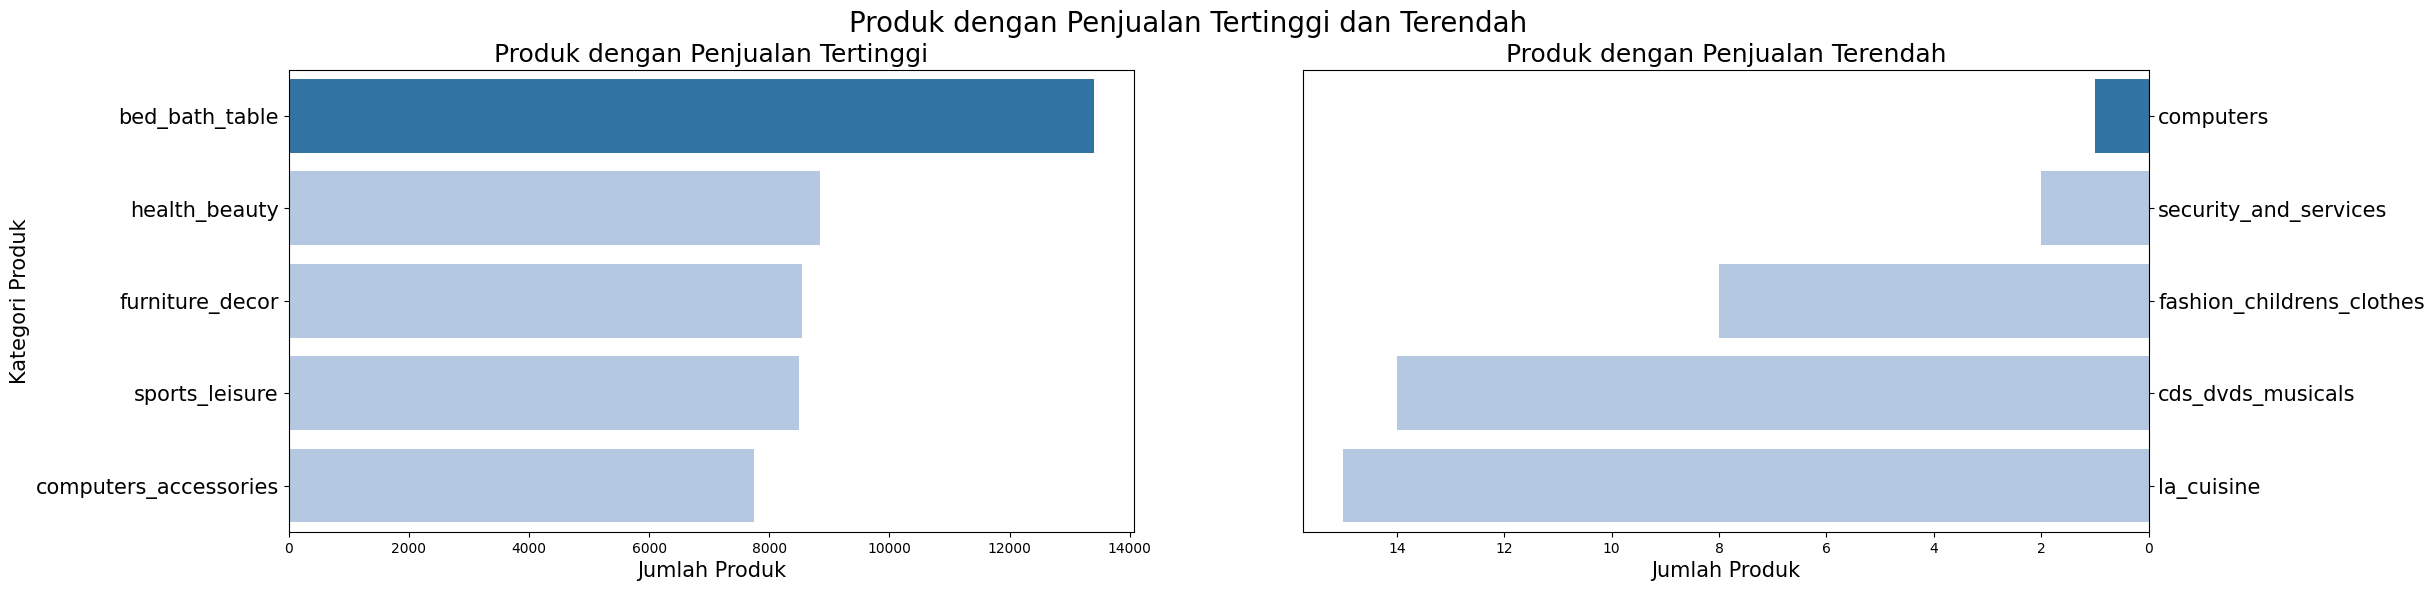

In [ ]:
# Mengatur ukuran gambar dan layout
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Warna untuk barplot
colors = ["#1f77b4", "#aec7e8", "#aec7e8", "#aec7e8", "#aec7e8"]

# Grafik untuk 5 produk dengan penjualan tertinggi
sns.barplot(x="product_id", y="product_category_name_english",
            data=sorted_df.head(5),
            hue="product_category_name_english", palette=colors, ax=ax[0], legend=False)

# Pengaturan label dan judul
ax[0].set_ylabel("Kategori Produk", fontsize=15)
ax[0].set_xlabel("Jumlah Produk", fontsize=15)
ax[0].set_title("Produk dengan Penjualan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Grafik untuk 5 produk dengan penjualan terendah
sns.barplot(x="product_id", y="product_category_name_english",
            data=sorted_df.sort_values(by="product_id", ascending=True).head(5),
            hue="product_category_name_english", palette=colors, ax=ax[1], legend=False)

# Pengaturan label dan judul
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Produk", fontsize=15)
ax[1].invert_xaxis()  # Membalikkan sumbu x
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Judul utama untuk keseluruhan plot
plt.suptitle("Produk dengan Penjualan Tertinggi dan Terendah", fontsize=20)

# Tampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana tingkat kepuasan pembeli terhadap produk berdasarkan rating ulasan?

<ipython-input-117-caebc309848a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)


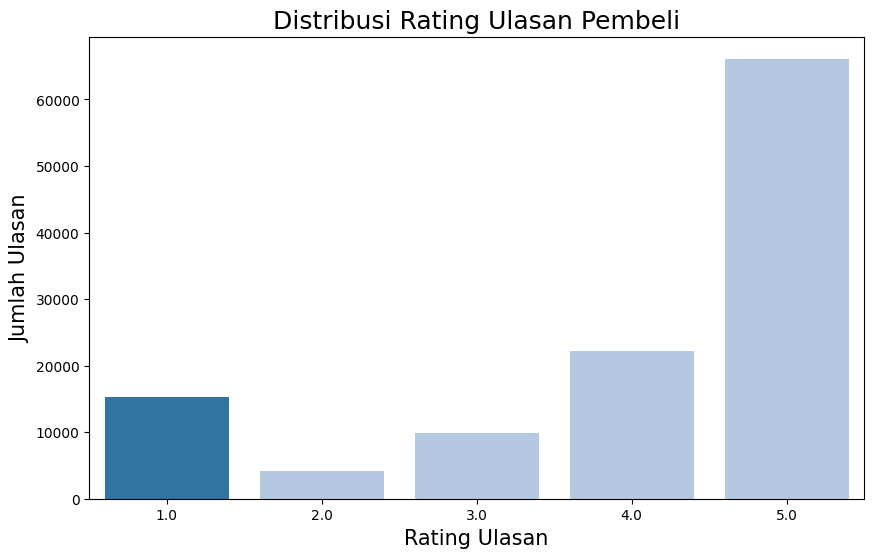

In [ ]:
# Menghitung distribusi rating ulasan
rating_counts = all_df['review_score'].value_counts().sort_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)
plt.title('Distribusi Rating Ulasan Pembeli', fontsize=18)
plt.xlabel('Rating Ulasan', fontsize=15)
plt.ylabel('Jumlah Ulasan', fontsize=15)
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 3: Bagaimana volume total pembelian per bulan dari waktu ke waktu?

In [ ]:
sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,29532.35
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,68461.04
5,2017-02-28,156709.50
6,2017-03-31,243367.28
7,2017-04-30,206223.25
8,2017-05-31,345057.53
9,2017-06-30,289226.23


In [ ]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')
sum_spend_df

,order_approved_at,total_spend
0,September,134.97
1,October,29532.35
2,November,0.00
3,December,10.90
4,January,68461.04
5,February,156709.50
6,March,243367.28
7,April,206223.25
8,May,345057.53
9,June,289226.23


In [ ]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,403757.71
13,October,430149.23
15,December,545054.76
22,July,568096.58
21,June,573687.67
23,August,597227.34
17,February,609335.01
19,April,633679.24
20,May,660736.68
18,March,668732.57


In [ ]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    675625.34
17          February    609335.01
18             March    668732.57
19             April    633679.24
20               May    660736.68
21              June    573687.67
22              July    568096.58
23            August    597227.34
12         September    403757.71
13           October    430149.23
14          November    679667.45
15          December    545054.76


In [ ]:
monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,980
2017-02-28,2099
2017-03-31,3252
2017-04-30,2820
2017-05-31,4458


In [ ]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq='M')

In [ ]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,980
5,February,2099
6,March,3252
7,April,2820
8,May,4458
9,June,3855


In [ ]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_df

,order_approved_at,order_count
12,September,5182
13,October,5593
15,December,6829
22,July,7185
21,June,7359
23,August,7642
19,April,8037
17,February,8189
20,May,8440
16,January,8507


In [ ]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)
monthly_df

,order_approved_at,order_count
16,January,8507
17,February,8189
18,March,8670
19,April,8037
20,May,8440
21,June,7359
22,July,7185
23,August,7642
12,September,5182
13,October,5593


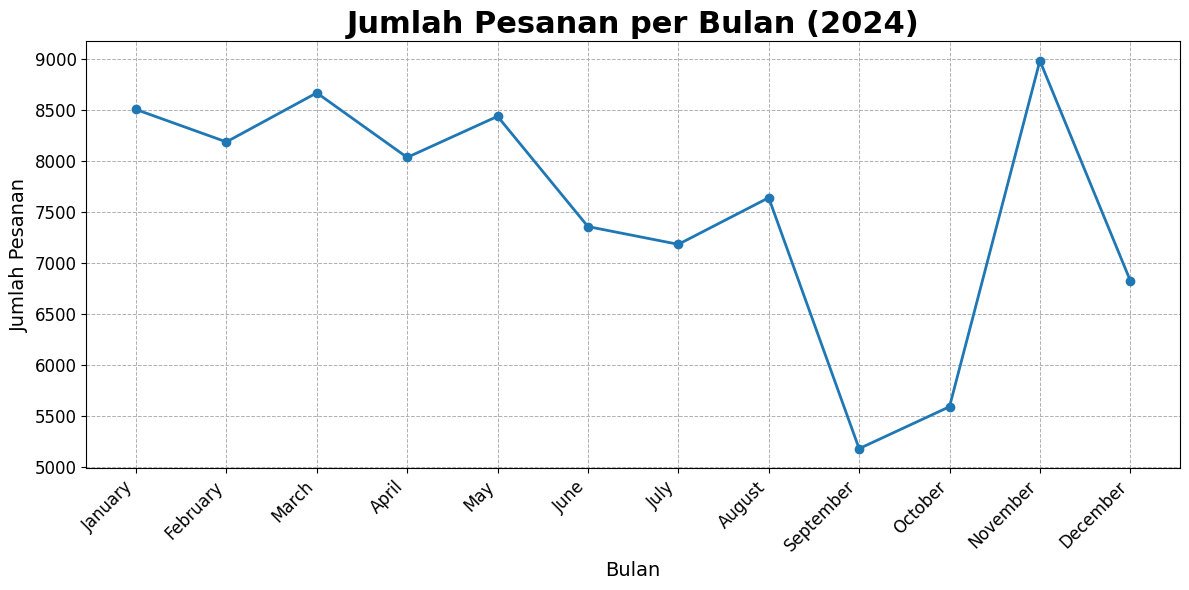

In [ ]:
# Buat plot
plt.figure(figsize=(12, 6))  # Ukuran figure yang lebih besar untuk keterbacaan yang lebih baik

# Plot data
plt.plot(
    monthly_df["order_approved_at"],  # Data untuk sumbu x
    monthly_df["order_count"],  # Data untuk sumbu y
    marker='o',  # Gaya marker
    linestyle='-',  # Gaya garis
    linewidth=2,  # Lebar garis
    color="#1f77b4"  # Warna garis (sesuaikan jika perlu)
)

# Judul
plt.title("Jumlah Pesanan per Bulan (2024)", loc="center", fontsize=22, fontweight='bold')

# Label sumbu X dan Y
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Pesanan", fontsize=14)

# Tanda sumbu X
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotasi label agar lebih mudah dibaca

# Tanda sumbu Y
plt.yticks(fontsize=12)

# Tambahkan garis grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Perbaiki tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()

### RFM Recency, Frequency, dan Monetary

In [ ]:
rfm.info()
rfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,349,1,89.80
1,000161a058600d5901f007fab4c27140,470,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,608,1,179.99
3,0002414f95344307404f0ace7a26f1d5,439,1,149.90
4,000379cdec625522490c315e70c7a9fb,210,1,93.00


<ipython-input-129-2025bf3734a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-129-2025bf3734a9>:9: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
<ipython-input-129-2025bf3734a9>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  # Rotate for readability
<ipython-input-129-2025bf3734a9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-129-2025bf3734a9>:25: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpret

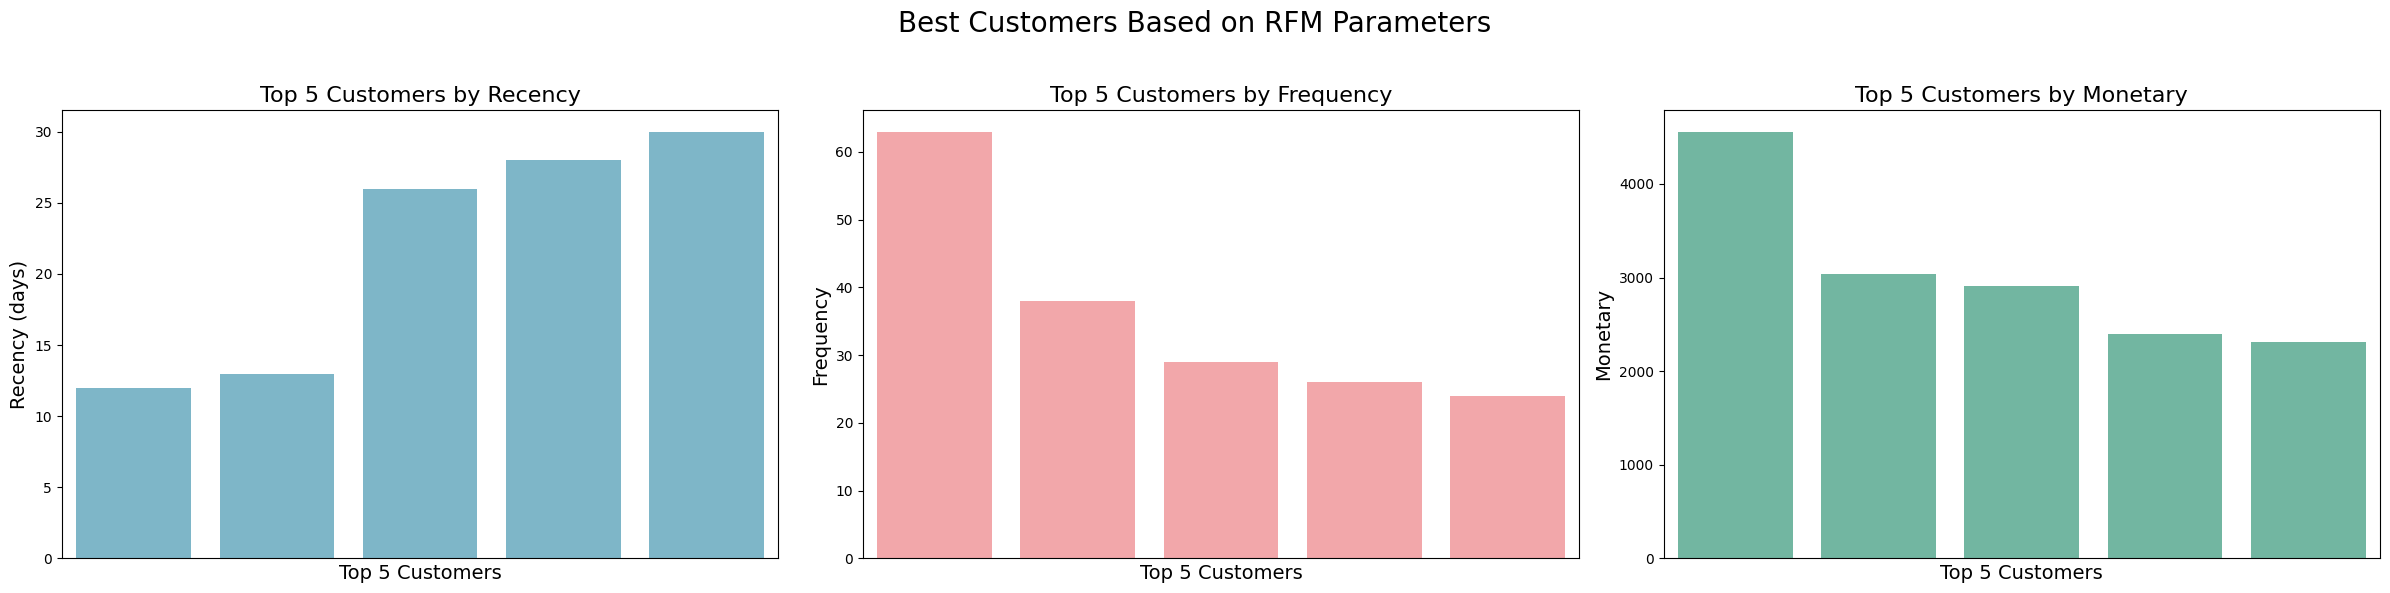

In [ ]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Define colors
plot_colors = ["#72BCD4", "#FF9A9E", "#66c2a5"]  # Different colors for each plot

# Plot Recency
recency_df = rfm.sort_values(by="Recency", ascending=True).head(5)
sns.barplot(
    x=recency_df.index.astype(str),  # Using index as x-axis labels
    y="Recency",
    data=recency_df,
    palette=[plot_colors[0]],  # Single color for consistency
    ax=ax[0]
)
ax[0].set_ylabel("Recency (days)", fontsize=14)
ax[0].set_xlabel("Top 5 Customers", fontsize=14)
ax[0].set_title("Top 5 Customers by Recency", fontsize=16)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)  # Rotate for readability
ax[0].set_xticks([])  # Remove x-axis ticks

# Plot Frequency
frequency_df = rfm.sort_values(by="Frequency", ascending=False).head(5)
sns.barplot(
    x=frequency_df.index.astype(str),  # Using index as x-axis labels
    y="Frequency",
    data=frequency_df,
    palette=[plot_colors[1]],  # Single color for consistency
    ax=ax[1]
)
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xlabel("Top 5 Customers", fontsize=14)
ax[1].set_title("Top 5 Customers by Frequency", fontsize=16)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)  # Rotate for readability
ax[1].set_xticks([])  # Remove x-axis ticks

# Plot Monetary
monetary_df = rfm.sort_values(by="Monetary", ascending=False).head(5)
sns.barplot(
    x=monetary_df.index.astype(str),  # Using index as x-axis labels
    y="Monetary",
    data=monetary_df,
    palette=[plot_colors[2]],  # Single color for consistency
    ax=ax[2]
)
ax[2].set_ylabel("Monetary", fontsize=14)
ax[2].set_xlabel("Top 5 Customers", fontsize=14)
ax[2].set_title("Top 5 Customers by Monetary", fontsize=16)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)  # Rotate for readability
ax[2].set_xticks([])  # Remove x-axis ticks

# Main title for the entire figure
plt.suptitle("Best Customers Based on RFM Parameters", fontsize=20)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit the main title
plt.show()

## Conclusion

1.   Produk apa yang memiliki jumlah pembelian tertinggi dan Terendah?

2.   Bagaimana tingkat kepuasan pembeli terhadap produk berdasarkan rating
ulasan?

3.   Bagaimana volume total pesanan per bulan?

**Produk apa yang memiliki jumlah pembelian tertinggi dan Terendah?**
- Dari analisis data pembelian, produk yang memiliki jumlah pembelian tertinggi adalah bed_bath_table dengan total 13.399 unit, menunjukkan popularitasnya yang sangat tinggi di pasar. Sebaliknya, produk dengan jumlah pembelian terendah adalah computers, yang hanya terjual sebanyak 1 unit. Ini menunjukkan bahwa computers memiliki permintaan yang sangat rendah dibandingkan dengan bed_bath_table.

**Bagaimana tingkat kepuasan pembeli terhadap produk berdasarkan rating
ulasan?**
- Sebagian besar pembeli sangat puas dengan produk, seperti yang terlihat dari jumlah ulasan dengan rating 5.0 (66.128 ulasan) dan 4.0 (22.239 ulasan). Meskipun ada beberapa ulasan negatif dengan rating 1.0 (15.286 ulasan) dan 2.0 (4.124 ulasan), rating tinggi mendominasi, menunjukkan kepuasan umum yang baik dari pelanggan.

** Bagaimana volume total pesanan per bulan?**
- Volume total pesanan per bulan menunjukkan variasi yang signifikan. November mencatat volume tertinggi dengan 8.985 pesanan, sedangkan September memiliki volume terendah dengan 5.182 pesanan. Secara umum, bulan-bulan dengan volume pesanan tinggi seperti November, March, dan May menunjukkan periode dengan aktivitas yang lebih besar, sementara July dan September memiliki volume pesanan yang relatif lebih rendah.
